In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
import sys
# modify "customized_path_to_homework", path of folder in drive, where you uploaded your homework
customized_path_to_homework = "/content/drive/My Drive/study/urb_comp/Assignment_3/Census/"
sys.path.append(customized_path_to_homework)

In [202]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import datetime
import warnings
sys.path.insert(0,'../')
%load_ext autoreload
%autoreload 2
import census_helpers
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [203]:
dt = pd.read_csv('/content/drive/My Drive/study/urb_comp/Assignment_3/Census/Datasets/adult.data.csv', sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')
# sneak peak in the data
dt.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


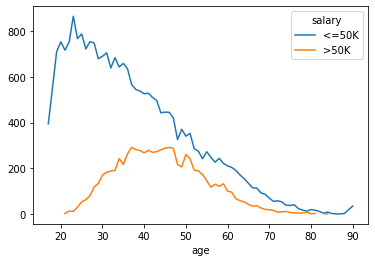

In [204]:
dt.groupby(['age','salary']).size().unstack().plot()

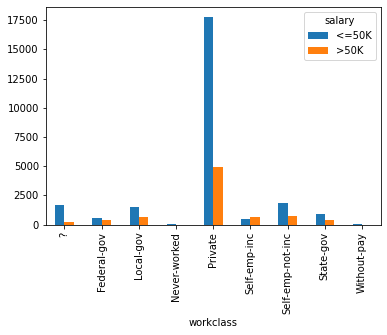

In [205]:
dt.groupby(['workclass','salary']).size().unstack().plot(kind='bar')

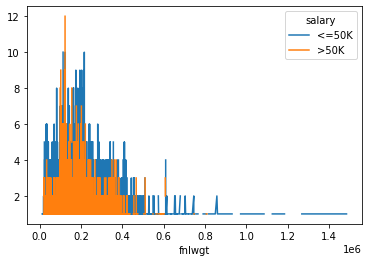

In [207]:
dt.groupby(['fnlwgt','salary']).size().unstack().plot()

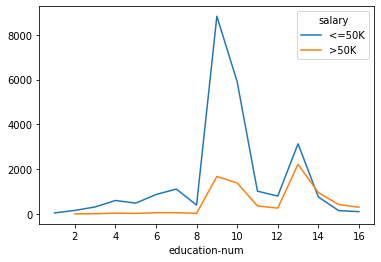

In [208]:
dt.groupby(['education-num','salary']).size().unstack().plot()

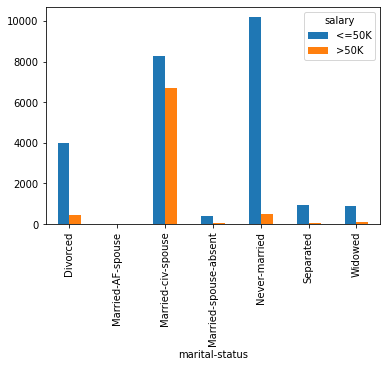

In [209]:
plt = dt.groupby(['marital-status','salary']).size().unstack().plot(kind='bar')

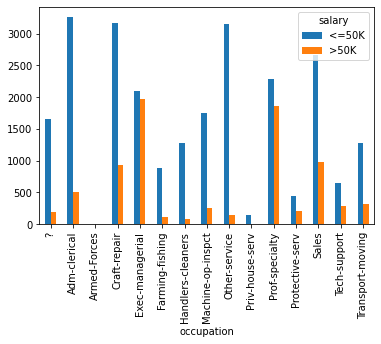

In [210]:
dt.groupby(['occupation','salary']).size().unstack().plot(kind='bar')

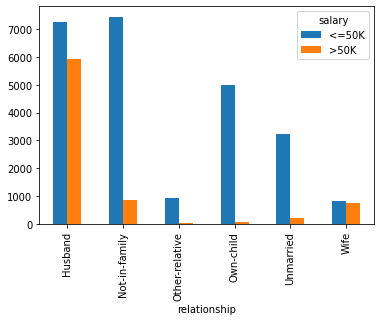

In [211]:
dt.groupby(['relationship','salary']).size().unstack().plot(kind='bar')

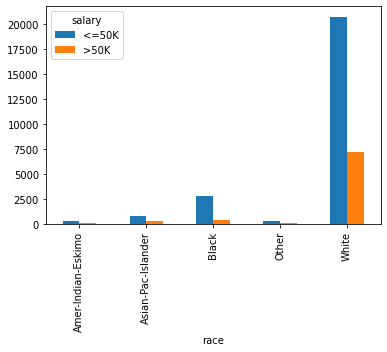

In [212]:
dt.groupby(['race','salary']).size().unstack().plot(kind='bar')

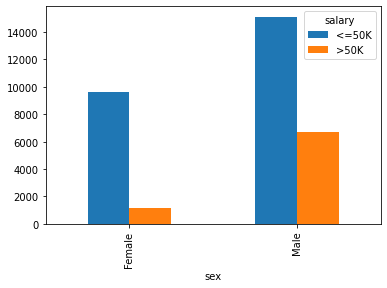

In [213]:
dt.groupby(['sex','salary']).size().unstack().plot(kind='bar')

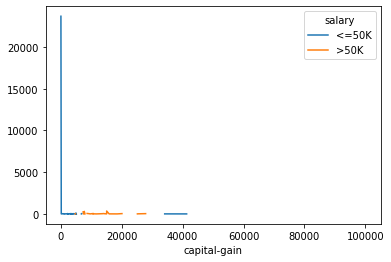

In [214]:
dt.groupby(['capital-gain','salary']).size().unstack().plot()

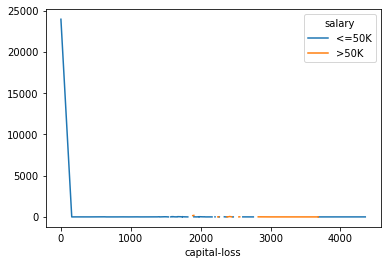

In [215]:
dt.groupby(['capital-loss','salary']).size().unstack().plot()

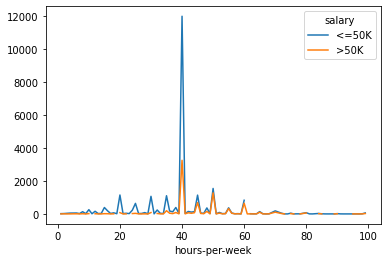

In [216]:
dt.groupby(['hours-per-week','salary']).size().unstack().plot()

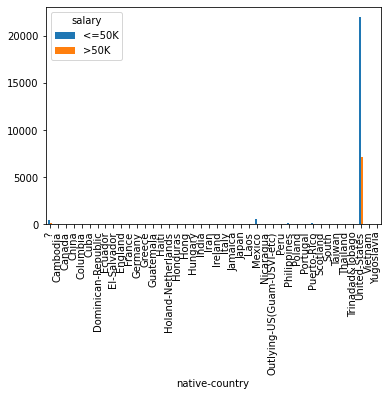

In [217]:
dt.groupby(['native-country','salary']).size().unstack().plot(kind='bar')

In [218]:
dt = census_helpers.preprocessing_census(dt)
# let's take a look at the processed data
dt.head(2)

,age,workclass,education-num,occupation,hours-per-week,income >50K
0,39,State-gov,13,Adm-clerical,40,0.0
1,50,Self-emp-not-inc,13,Exec-managerial,13,0.0


In [219]:
X = census_helpers.convert_categorical(dt)
# replace all inf, -inf with zeros
X.replace("?", np.nan,inplace=True)
X.fillna(0,inplace=True)

In [220]:
X.shape

(32561, 28)

In [221]:
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

dtmodel = DecisionTreeClassifier(random_state=0, max_depth=2)
gnbmodel = GaussianNB()
lrmodel = LogisticRegression(random_state=0)

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

y_cls = X['income >50K']
XX_cls = X.drop('income >50K',axis = 1)

In [223]:
print(y_cls.shape)
print(XX_cls.shape)

(32561,)
(32561, 27)


In [224]:
x_train, x_test, y_train, y_test = train_test_split(XX_cls[:10000], y_cls[:10000], random_state=42)

In [225]:
#decision tree
print('Decision Tree')
dtmodel.fit(x_train,y_train)
y_pred_dt = dtmodel.predict(x_test)
(precision, recall, fscore, support) = precision_recall_fscore_support(y_test, y_pred_dt, average='macro')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0], (y_test != y_pred_dt).sum()))

Decision Tree
Precision: 0.7120500331440759	Recall: 0.6732724219891406	fscore:0.6871943578458342
Number of mislabeled points out of a total 2500 points : 524


In [226]:
#logistic regression
print('Logistic Regression')
lrmodel.fit(x_train, y_train)
y_pred_lr = lrmodel.predict(x_test)
(precision, recall, fscore, support) = precision_recall_fscore_support(y_test, y_pred_lr, average='macro')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0], (y_test != y_pred_lr).sum()))

Logistic Regression
Precision: 0.7419556521526147	Recall: 0.6637126845330251	fscore:0.6848558638331366
Number of mislabeled points out of a total 2500 points : 492


In [227]:
#naive bayes
print('Naive Bayes')
gnbmodel.fit(x_train,y_train)
y_pred_nb = gnbmodel.predict(x_test)
(precision, recall, fscore, support) = precision_recall_fscore_support(y_test, y_pred_nb, average='macro')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0], (y_test != y_pred_nb).sum()))

Naive Bayes
Precision: 0.6106797408820659	Recall: 0.608789986698358	fscore:0.4435799688788796
Number of mislabeled points out of a total 2500 points : 1391


# Testing with adult.test

In [228]:
dt_test = pd.read_csv('/content/drive/My Drive/study/urb_comp/Assignment_3/Census/Datasets/adult.test.csv', sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')
# sneak peak in the data
dt_test.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [229]:
dt_test['salary'] = dt_test['salary'].apply(lambda x: x.replace(".",""))
dt_test = census_helpers.preprocessing_census(dt_test)
# let's take a look at the processed data
dt_test.head(2)

,age,workclass,education-num,occupation,hours-per-week,income >50K
0,25,Private,7,Machine-op-inspct,40,0.0
1,38,Private,9,Farming-fishing,50,0.0


In [230]:
X_test = census_helpers.convert_categorical(dt_test)
# replace all inf, -inf with zeros
X_test.replace("?", np.nan,inplace=True)
X_test.fillna(0,inplace=True)

In [231]:
y_cls_test = X_test['income >50K']
XX_cls_test = X_test.drop('income >50K',axis = 1)

In [232]:
#decision tree test
print('Decision Tree Test')
y_pred_dt_test = dtmodel.predict(XX_cls_test)
(precision, recall, fscore, support) = precision_recall_fscore_support(y_cls_test, y_pred_dt_test, average='macro')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))
print("Number of mislabeled points out of a total %d points : %d"% (XX_cls_test.shape[0], (y_cls_test != y_pred_dt_test).sum()))

Decision Tree Test
Precision: 0.7046083446405358	Recall: 0.6713371309279391	fscore:0.6838456859998135
Number of mislabeled points out of a total 16281 points : 3426


In [233]:
#logistic regression test
print('Logistic Regression Test')
y_pred_lr_test = lrmodel.predict(XX_cls_test)
(precision, recall, fscore, support) = precision_recall_fscore_support(y_cls_test, y_pred_lr_test, average='macro')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))
print("Number of mislabeled points out of a total %d points : %d"% (XX_cls_test.shape[0], (y_cls_test != y_pred_lr_test).sum()))

Logistic Regression Test
Precision: 0.7216166882797588	Recall: 0.6523474955886052	fscore:0.6714057985485488
Number of mislabeled points out of a total 16281 points : 3302


In [234]:
#naive bayes test
print('Naive Bayes Test')
y_pred_nb_test = gnbmodel.predict(XX_cls_test)
(precision, recall, fscore, support) = precision_recall_fscore_support(y_cls_test, y_pred_nb_test, average='macro')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))
print("Number of mislabeled points out of a total %d points : %d"% (XX_cls_test.shape[0], (y_cls_test != y_pred_nb_test).sum()))

Naive Bayes Test
Precision: 0.6130153628062124	Recall: 0.6125676920924846	fscore:0.4413723600006952
Number of mislabeled points out of a total 16281 points : 9095


In [235]:
# 5 fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
print('Decision Tree : ')
print(cross_val_score(dtmodel, XX_cls, y_cls, cv=cv))
print('Logistic Regression : ')
print(cross_val_score(lr_model, XX_cls, y_cls, cv=cv))
print('Naive Bayes : ')
print(cross_val_score(gnbmodel, XX_cls, y_cls, cv=cv))



Decision Tree : 
[0.7868714  0.78318618 0.78364683 0.78203455 0.78840691]
Logistic Regression : 
[0.79831094 0.79677543 0.79523992 0.79723608 0.80046065]
Naive Bayes : 
[0.46641075 0.44583493 0.45451056 0.43408829 0.44230326]
